## Spatial Data Analysis Code-Along

> Author: Matt Brems

### Install packages if you haven't already:

In [26]:
#!pip install pysal
#!pip install palettable
#!pip install folium

A common package that is used to do spatial data analysis/exploration is [geopandas](http://geopandas.org/). However, there are a lot of weird dependencies that may give people trouble, so we'll avoid using geopandas today. There's a separate notebook that'll allow you to do some work in it if you want to test it out!
- I recommend that you set up an environment to do this if you want to try out geopandas.

In [27]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import *
import statsmodels.api as sm

%matplotlib inline

### First, we'll read in the shapefile and explore it a bit.

> A shapefile is a **file** that can hold the **shape** of an object. More technically, it is type of file that more easily contains the boundaries of objects and attributes of objects (i.e. the center of the object, the geographic location of the object if that exists) and it interfaces well with various programs.

In [28]:
shp_link = '../us48_data/us48.shp'

In [29]:
import pysal.lib.io

In [30]:
us = pysal.lib.io.open(shp_link)

In [31]:
us

#### Let's check out the header.

In [32]:
us.header

{'File Code': 9994,
 'Unused0': 0,
 'Unused1': 0,
 'Unused2': 0,
 'Unused3': 0,
 'Unused4': 0,
 'File Length': 93238,
 'Version': 1000,
 'Shape Type': 5,
 'BBOX Xmin': -124.7314224243164,
 'BBOX Ymin': 24.95596694946289,
 'BBOX Xmax': -66.9698486328125,
 'BBOX Ymax': 49.371734619140625,
 'BBOX Zmin': 3.754550197104843e+72,
 'BBOX Zmax': 0.0,
 'BBOX Mmin': 0.0,
 'BBOX Mmax': 0.0}

> The **BBOX** refers to a "bounding box," which is basically the box you'd create if you were to click and drag the smallest possible rectangle over a shape that contains the entire shape.

In [33]:
len(us)

48

In [34]:
list(us)

#### Let's check out one individual observation - in this case, it'll be a U.S. state.

In [35]:
us[0]

#### There are plenty of [attributes that a polygon can have](http://pysal.readthedocs.io/en/latest/library/cg/shapes.html#pysal.cg.shapes.Polygon).

In [36]:
us[0].vertices

[(-122.40074920654297, 48.22539520263672),
 (-122.46158599853516, 48.22854232788086),
 (-122.45315551757812, 48.1286735534668),
 (-122.36007690429688, 48.060279846191406),
 (-122.51324462890625, 48.1341552734375),
 (-122.54080200195312, 48.21063995361328),
 (-122.50785827636719, 48.253971099853516),
 (-122.40313720703125, 48.24677276611328),
 (-122.3770523071289, 48.28989791870117),
 (-122.5630874633789, 48.41442108154297),
 (-122.6657485961914, 48.41307067871094),
 (-122.69812774658203, 48.494503021240234),
 (-122.60689544677734, 48.51899719238281),
 (-122.5219497680664, 48.45857620239258),
 (-122.4725570678711, 48.46236801147461),
 (-122.50402069091797, 48.55961608886719),
 (-122.42826843261719, 48.59956741333008),
 (-122.48651885986328, 48.63874053955078),
 (-122.52527618408203, 48.71189498901367),
 (-122.51557159423828, 48.75809097290039),
 (-122.69611358642578, 48.803184509277344),
 (-122.7529525756836, 48.91015625),
 (-122.82112884521484, 48.95089340209961),
 (-122.7426528930664,

In [37]:
us[0].centroid

(-120.42689103452584, 47.376901373520255)

In [38]:
print("Left: " + str(us[0].bounding_box.left))
print("Right: " + str(us[0].bounding_box.right))
print("Upper: " + str(us[0].bounding_box.upper))
print("Lower: " + str(us[0].bounding_box.lower))

Left: -124.7314224243164
Right: -116.91815185546875
Upper: 49.000003814697266
Lower: 45.543251037597656


In [39]:
us[0].bounding_box.right - us[0].bounding_box.left

7.813270568847656

In [40]:
us[0].bounding_box.upper - us[0].bounding_box.lower

3.4567527770996094

In [41]:
(us[0].bounding_box.right - us[0].bounding_box.left) * (us[0].bounding_box.upper - us[0].bounding_box.lower)

27.00854473709478

In [42]:
us[0].area

20.74983112933114

In [43]:
us[0].contains_point((-120, 47))

True

In [44]:
us[0].contains_point((-120, 57))

False

#### Thanks to Tucker Allen (DSI-US-3 grad from NYC) for the following code allowing you to visualize states by their vertices of the shapefile:

(24.95596694946289, 49.371734619140625)

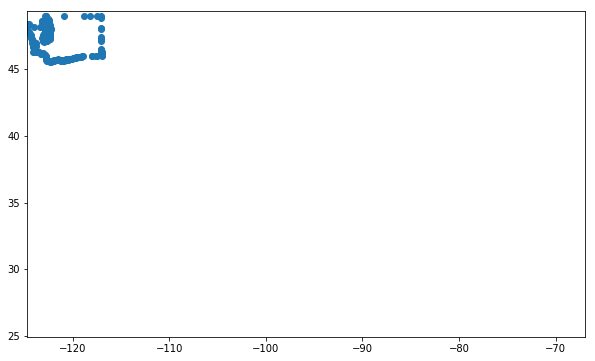

In [45]:
x = []
y = []
for i in us[0].vertices: # Change index of us (0-47) to see vertices' points
    x.append(i[0])
    y.append(i[1])
fig, ax = matplotlib.pyplot.subplots(figsize=(10,6))
matplotlib.pyplot.scatter(x, y)
matplotlib.pyplot.xlim(us.header['BBOX Xmin'] , us.header['BBOX Xmax']) # limits of U.S.
matplotlib.pyplot.ylim(us.header['BBOX Ymin'] , us.header['BBOX Ymax']) # limits of U.S.

(24.95596694946289, 49.371734619140625)

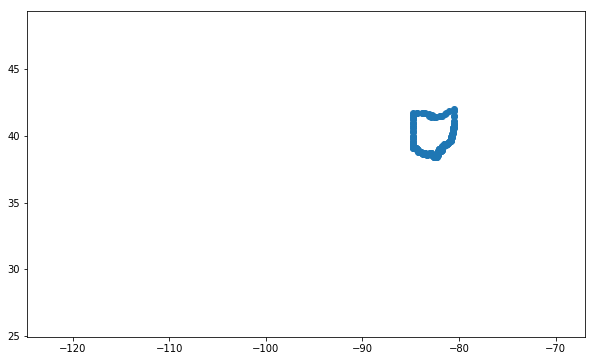

In [46]:
x = []
y = []
for i in us[24].vertices: # Change index of us (0-47) to see vertices' points
    x.append(i[0])
    y.append(i[1])
fig, ax = matplotlib.pyplot.subplots(figsize=(10,6))
matplotlib.pyplot.scatter(x, y)
matplotlib.pyplot.xlim(us.header['BBOX Xmin'] , us.header['BBOX Xmax']) # limits of U.S.
matplotlib.pyplot.ylim(us.header['BBOX Ymin'] , us.header['BBOX Ymax']) # limits of U.S.

(24.95596694946289, 49.371734619140625)

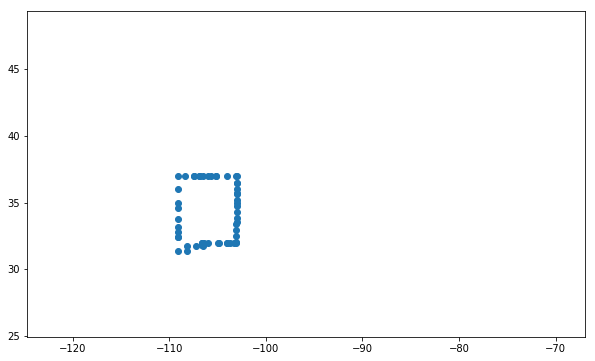

In [47]:
x = []
y = []
for i in us[39].vertices: # Change index of us (0-47) to see vertices points
    x.append(i[0])
    y.append(i[1])
fig, ax = matplotlib.pyplot.subplots(figsize=(10,6))
matplotlib.pyplot.scatter(x, y)
matplotlib.pyplot.xlim(us.header['BBOX Xmin'] , us.header['BBOX Xmax']) # limits of U.S.
matplotlib.pyplot.ylim(us.header['BBOX Ymin'] , us.header['BBOX Ymax']) # limits of U.S.

#### Let's read in weights and see what they look like.

> Weights will often be given to you, but sometimes you may need to specify weights. Below, we'll see how a tuple and dictionary are used to store the weights. The first value in the tuple refers to the specific observation/area; the second value in the tuple provides the dictionary of connected areas and the associated weights.

In [48]:
w = pysal.lib.io.open('../us48_data/states48.gal').read()

In [49]:
w

In [50]:
for i in w:
    print(i)

('0', {'7': 1.0, '8': 1.0, '21': 1.0, '39': 1.0})
('1', {'3': 1.0, '4': 1.0, '25': 1.0, '28': 1.0, '41': 1.0})
('2', {'15': 1.0, '21': 1.0, '22': 1.0, '33': 1.0, '39': 1.0, '40': 1.0})
('3', {'1': 1.0, '25': 1.0, '34': 1.0})
('4', {'1': 1.0, '13': 1.0, '24': 1.0, '28': 1.0, '33': 1.0, '41': 1.0, '47': 1.0})
('5', {'18': 1.0, '29': 1.0, '36': 1.0})
('6', {'17': 1.0, '27': 1.0, '35': 1.0})
('7', {'0': 1.0, '8': 1.0})
('8', {'0': 1.0, '7': 1.0, '30': 1.0, '37': 1.0, '39': 1.0})
('9', {'23': 1.0, '25': 1.0, '34': 1.0, '41': 1.0, '44': 1.0, '47': 1.0})
('10', {'11': 1.0, '12': 1.0, '14': 1.0, '22': 1.0, '46': 1.0})
('11', {'10': 1.0, '14': 1.0, '19': 1.0, '32': 1.0})
('12', {'10': 1.0, '20': 1.0, '22': 1.0, '24': 1.0, '38': 1.0, '46': 1.0})
('13', {'4': 1.0, '22': 1.0, '24': 1.0, '33': 1.0})
('14', {'10': 1.0, '11': 1.0, '22': 1.0, '32': 1.0, '39': 1.0, '43': 1.0, '45': 1.0})
('15', {'2': 1.0, '21': 1.0, '40': 1.0})
('16', {'26': 1.0})
('17', {'6': 1.0, '35': 1.0, '43': 1.0, '45': 1.0})
('1

#### We detect if spatial dependence exists using Moran's I, a permutation test.

In [51]:
import pysal.explore

In [52]:
y = np.array(pysal.lib.io.open('../us48_data/usjoin.csv').by_col('2009'))

In [53]:
moran_i = pysal.explore.esda.Moran(y,
                                   w,
                                   two_tailed = True,
                                   permutations = 1000)

In [54]:
moran_i.I # observed Moran's I statistic

0.4287689505041785

Remember that -1 indicates a perfect negative relationship (chessboard) and +1 indicates perfect positive spatial relationship (two sides that were perfectly aligned color-wise).

In [55]:
moran_i.z_sim # z-score

4.666914185875708

In [56]:
moran_i.p_sim # p-value

0.000999000999000999

Given our small $p$-value, we reject $H_0$ of no spatial association! Thus, **there is significant evidence to suggest that there is some spatial relationship in this 2009 median income data**.
> Note that we're not saying that the only influence on income is spatial. (That would be silly.) We're simply saying that, in looking at how our data are spatially organized, there appears to be some effect of space on median income in 2009.

#### Let's build a model taking space into account!

In [57]:
y

array([32274, 32077, 31493, 40902, 40093, 52736, 40135, 36565, 33086,
       30987, 40933, 33174, 35983, 37036, 31250, 35151, 35268, 47159,
       49590, 34280, 40920, 29318, 35106, 32699, 37057, 38009, 41882,
       48123, 32197, 46844, 33564, 38672, 35018, 33708, 35210, 38827,
       41283, 30835, 36499, 33512, 35674, 30107, 36752, 43211, 40619,
       31843, 35676, 42504])

In [58]:
X = np.array(pysal.lib.io.open('../us48_data/usjoin.csv').by_col('2008'))

In [59]:
X = sm.add_constant(X)

In [60]:
X

array([[1.0000e+00, 3.2819e+04],
       [1.0000e+00, 3.3445e+04],
       [1.0000e+00, 3.1800e+04],
       [1.0000e+00, 4.2377e+04],
       [1.0000e+00, 4.1719e+04],
       [1.0000e+00, 5.4528e+04],
       [1.0000e+00, 4.0698e+04],
       [1.0000e+00, 3.7808e+04],
       [1.0000e+00, 3.4127e+04],
       [1.0000e+00, 3.2322e+04],
       [1.0000e+00, 4.2049e+04],
       [1.0000e+00, 3.3978e+04],
       [1.0000e+00, 3.6726e+04],
       [1.0000e+00, 3.7983e+04],
       [1.0000e+00, 3.1302e+04],
       [1.0000e+00, 3.5730e+04],
       [1.0000e+00, 3.4906e+04],
       [1.0000e+00, 4.7040e+04],
       [1.0000e+00, 5.0607e+04],
       [1.0000e+00, 3.5215e+04],
       [1.0000e+00, 4.2299e+04],
       [1.0000e+00, 2.9591e+04],
       [1.0000e+00, 3.5775e+04],
       [1.0000e+00, 3.3293e+04],
       [1.0000e+00, 3.8128e+04],
       [1.0000e+00, 4.0332e+04],
       [1.0000e+00, 4.2461e+04],
       [1.0000e+00, 4.9233e+04],
       [1.0000e+00, 3.2585e+04],
       [1.0000e+00, 4.8692e+04],
       [1.

In [61]:
non_spatial_lm = sm.OLS(y, X).fit()

In [62]:
non_spatial_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     3939.
Date:                Wed, 03 Jul 2019   Prob (F-statistic):           3.20e-46
Time:                        06:12:05   Log-Likelihood:                -373.17
No. Observations:                  48   AIC:                             750.3
Df Residuals:                      46   BIC:                             754.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        910.7424    584.517      1.558      0.126    -265.829    2087.314
x1             0.9539      0.015     62.758      0.000       0.923       0.984
==============================================================================
Omnibus:                        1.239   Durbin-Watson:                   1.408
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.497
Skew:                          -0.098   Prob(JB):                        0.780
Kurtosis:                       3.459   Cond. No.                     2.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
X = np.array(pysal.lib.io.open('../us48_data/usjoin.csv').by_col('2008'))

In [64]:
y.resize(len(y), 1)

In [65]:
X.resize(len(X), 1)

In [66]:
y.shape, X.shape

((48, 1), (48, 1))

In [67]:
import pysal.model.spreg

In [68]:
spatial_lm = pysal.model.spreg.OLS(y, X, w = None)

In [69]:
print(spatial_lm.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :     dep_var                Number of Observations:          48
Mean dependent var  :  37205.0208                Number of Variables   :           2
S.D. dependent var  :   5414.4485                Degrees of Freedom    :          46
R-squared           :      0.9885
Adjusted R-squared  :      0.9882
Sum squared residual:15906822.633                F-statistic           :   3938.5630
Sigma-square        :  345800.492                Prob(F-statistic)     :   3.201e-46
S.E. of regression  :     588.048                Log likelihood        :    -373.174
Sigma-square ML     :  331392.138                Akaike info criterion :     750.349
S.E of regression ML:    575.6667                Schwarz criterion     :     754.091

-----------------------------------------------------------------------------

In [70]:
spatial_lm_weights = pysal.model.spreg.OLS(y,
                                  X,
                                  w = w,
                                  spat_diag = True,
                                  moran = True)

In [71]:
print(spatial_lm_weights.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:          48
Mean dependent var  :  37205.0208                Number of Variables   :           2
S.D. dependent var  :   5414.4485                Degrees of Freedom    :          46
R-squared           :      0.9885
Adjusted R-squared  :      0.9882
Sum squared residual:15906822.633                F-statistic           :   3938.5630
Sigma-square        :  345800.492                Prob(F-statistic)     :   3.201e-46
S.E. of regression  :     588.048                Log likelihood        :    -373.174
Sigma-square ML     :  331392.138                Akaike info criterion :     750.349
S.E of regression ML:    575.6667                Schwarz criterion     :     754.091

-----------------------------------------------------------------------------

In [72]:
spatial_lm_weights = pysal.model.spreg.GM_Lag(y, X, w = w, spat_diag = True)

In [73]:
print(spatial_lm_weights.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: SPATIAL TWO STAGE LEAST SQUARES
--------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:          48
Mean dependent var  :  37205.0208                Number of Variables   :           3
S.D. dependent var  :   5414.4485                Degrees of Freedom    :          45
Pseudo R-squared    :      0.9906
Spatial Pseudo R-squared:  0.9901

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT    -423.6649878     699.2169242      -0.6059135       0.5445722
               var_1       0.9312197       0.0156345      59.5618775       0.0000000
           W_dep_var       0.0590480       0.0208392       

Spatial Auto-regressive Model:
$$
Y_i = \beta_0 + \rho \sum_{j} W_{ij}Y_j
$$

The model we fit:
$$
Y_i = \beta_0 + \beta_1[\text{2008 income}]_i + \rho \sum_{j} W_{ij}Y_j
$$

### Suppose want to generate our own weights!

In [74]:
import pysal.lib

In [75]:
wt = pysal.lib.weights.DistanceBand.from_shapefile("../us48_data/us48.shp", # name of shapefile
                                 threshold=10, # units to search
                                 binary=True) # 1/0 weights or distance-based weights

In [76]:
list(wt)

[(0, {7: 1.0, 10: 1.0, 21: 1.0}),
 (1, {3: 1.0, 4: 1.0, 5: 1.0, 7: 1.0, 22: 1.0, 29: 1.0}),
 (2,
  {8: 1.0,
   11: 1.0,
   13: 1.0,
   15: 1.0,
   16: 1.0,
   17: 1.0,
   18: 1.0,
   19: 1.0,
   26: 1.0,
   28: 1.0}),
 (3, {1: 1.0, 4: 1.0, 5: 1.0, 9: 1.0, 12: 1.0, 14: 1.0, 29: 1.0, 31: 1.0}),
 (4,
  {1: 1.0,
   3: 1.0,
   5: 1.0,
   9: 1.0,
   12: 1.0,
   14: 1.0,
   29: 1.0,
   31: 1.0,
   33: 1.0,
   35: 1.0}),
 (5,
  {1: 1.0,
   3: 1.0,
   4: 1.0,
   7: 1.0,
   14: 1.0,
   21: 1.0,
   22: 1.0,
   29: 1.0,
   34: 1.0,
   39: 1.0}),
 (6,
  {9: 1.0,
   12: 1.0,
   20: 1.0,
   24: 1.0,
   25: 1.0,
   30: 1.0,
   33: 1.0,
   37: 1.0,
   47: 1.0}),
 (7, {0: 1.0, 1: 1.0, 5: 1.0, 10: 1.0, 21: 1.0, 22: 1.0, 23: 1.0}),
 (8,
  {2: 1.0,
   11: 1.0,
   13: 1.0,
   15: 1.0,
   16: 1.0,
   17: 1.0,
   18: 1.0,
   19: 1.0,
   26: 1.0,
   27: 1.0,
   28: 1.0,
   32: 1.0}),
 (9,
  {3: 1.0,
   4: 1.0,
   6: 1.0,
   12: 1.0,
   14: 1.0,
   25: 1.0,
   31: 1.0,
   33: 1.0,
   47: 1.0}),
 (10, {0: 1.0, 7

(24.95596694946289, 49.371734619140625)

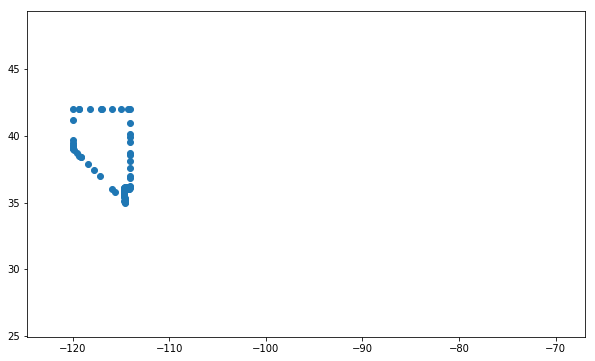

In [77]:
x = []
y = []
for i in us[21].vertices: # Change index of us (0-47) to see vertices' points
    x.append(i[0])
    y.append(i[1])
fig, ax = matplotlib.pyplot.subplots(figsize=(10,6))
matplotlib.pyplot.scatter(x, y)
matplotlib.pyplot.xlim(us.header['BBOX Xmin'] , us.header['BBOX Xmax']) # limits of U.S.
matplotlib.pyplot.ylim(us.header['BBOX Ymin'] , us.header['BBOX Ymax']) # limits of U.S.